In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats, norm, shapiro

## Part A

In [8]:
# Load the data
file_path = 'HASU Historical Data.csv' 
data = pd.read_csv(file_path)

time_index = np.arange(0,len(data['Price']))
time_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Part B and Part C

In [9]:
# Compute the log returns and droping the first row which will have NaN log return
log_returns = np.log(data['Price'] / data['Price'].shift(1)).dropna()
print(log_returns)

# Estimate mean and variance of log returns
mu = log_returns.mean()
variance = log_returns.var()

print(mu, variance)

mu_gb = mu + variance/2
print (mu_gb)

1      0.024541
2      0.000000
3      0.000000
4      0.058841
5      0.002853
         ...   
493    0.012142
494   -0.003454
495    0.003454
496    0.001723
497    0.001720
Name: Price, Length: 497, dtype: float64
0.0011909837066137467 0.0005467189389938387
0.001464343176110666


## Part D

### Ho - Log returns are normally distributed
### Ha - Log returns are not normally distributed

In [10]:
stat, p = shapiro(log_returns)
print('Statistics= %.3f, p = %.3f'%(stat,p))
alpha = 0.05 # Significance level
if p > alpha:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")

Statistics= 0.964, p = 0.000
Reject null hypothesis


### This dataset is not normally distributed, likely due to the small sample size we are working with.
### Therefore it is not appropriate to model the closing price of HASU using geometric Brownian motion

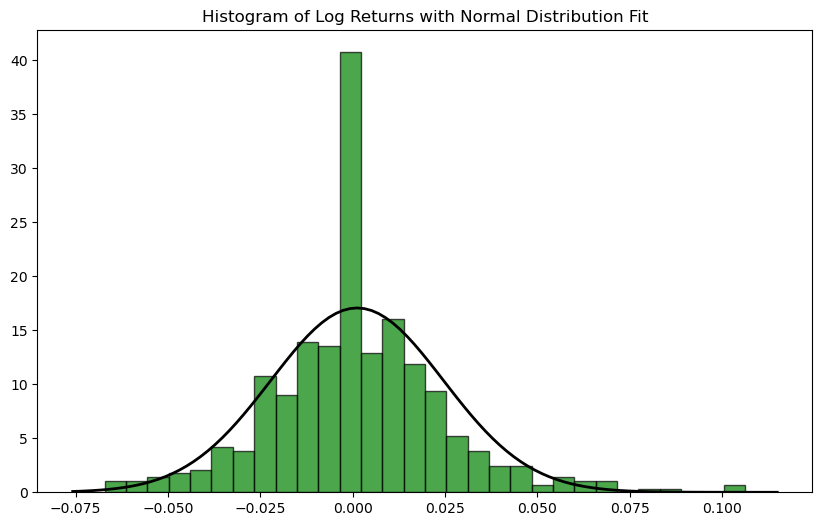

In [15]:
# Plot histogram of log returns with a normal distribution fit
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=30, alpha=0.7, color='g',edgecolor='black', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, log_returns.mean(), log_returns.std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Log Returns with Normal Distribution Fit')
plt.show()

## Part E

In [17]:
# Parameters for simulation
num_simulations = 5000
num_days = 19
dt = 1  # time step
last_price = data['Price'].iloc[-1]
sigma = variance**(1/2)

# Define the BrownianG function
def BrownianG(m, T, N, sigma, mu, w0, GB):
    dt = T / N
    x = np.zeros((m, N+1))
    x[:, 0] = w0
    x0 = x[:, 0]
    
    if not GB:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * np.sqrt(dt))
        np.cumsum(r, axis=1, out=x[:, 1:])
        x[:, 1:] += w0
    else:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * np.sqrt(dt))
        np.cumsum(r, axis=1, out=x[:, 1:])
        if w0 != 0:
            x[:, 1:] = w0 * np.exp(x[:, 1:])
        else:
            x[:, 1:] = np.exp(x[:, 1:])
    
    return x

# Simulate 5000 sample paths
simulated_paths = BrownianG(num_simulations, num_days, num_days, sigma, mu, last_price, True)
simulated_paths_df = pd.DataFrame(simulated_paths.T) # Converted to a DataFrame for easier manipulation
print(simulated_paths_df)


         0          1          2          3          4          5     \
0   58.200000  58.200000  58.200000  58.200000  58.200000  58.200000   
1   61.182479  58.795934  59.578319  58.930998  59.334335  57.094585   
2   59.365418  57.837325  58.380841  59.509847  59.722049  57.477794   
3   58.970974  55.740560  57.827730  59.492925  59.555818  58.609981   
4   58.525187  55.566637  57.694813  58.872368  60.260985  57.931737   
5   58.950667  54.174137  60.005523  59.025895  62.630290  57.068970   
6   58.501324  52.487363  57.477950  59.717786  61.834954  57.000839   
7   60.538969  51.882479  58.428926  58.960062  61.088503  56.170278   
8   59.498296  53.371965  61.105407  57.344810  58.928563  55.580000   
9   57.763575  53.122907  59.116219  59.338606  57.430932  55.640846   
10  57.645282  54.422589  56.665632  61.679670  58.382461  56.472528   
11  57.119605  52.536086  61.452834  63.230256  57.024125  56.700787   
12  57.718169  52.458430  63.214201  61.876248  56.321479  55.87

## Part F

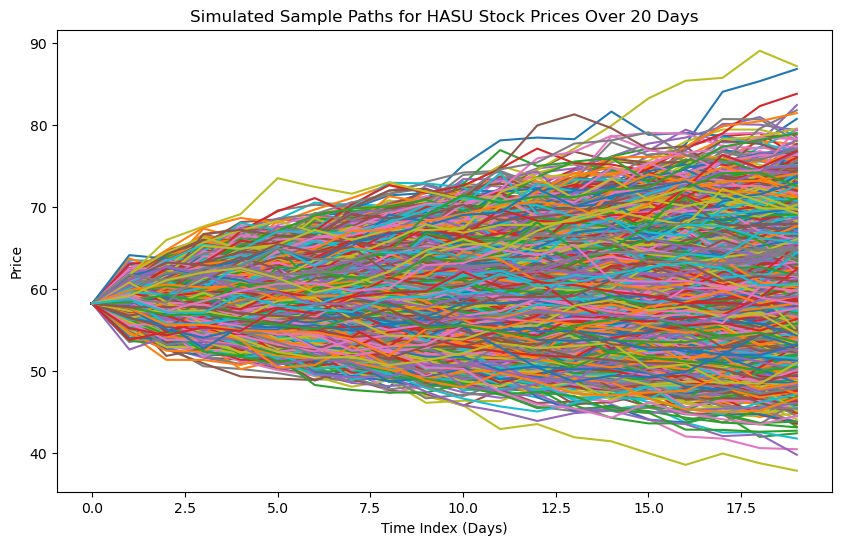

In [18]:
# Plotting a subset of the sample paths
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths_df)
plt.xlabel('Time Index (Days)')
plt.ylabel('Price')
plt.title('Simulated Sample Paths for HASU Stock Prices Over 20 Days')
plt.show()

## Part G

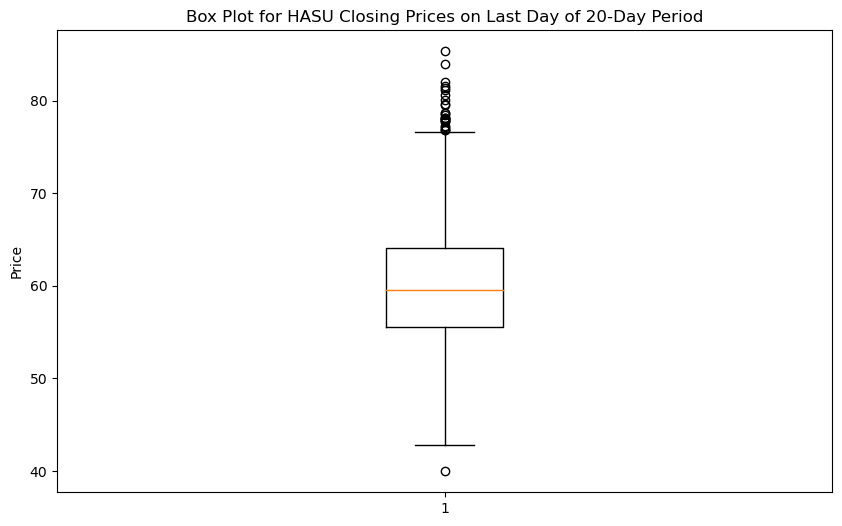

In [102]:
# Plot the box plot for the closing prices on the last day
last_day_prices = simulated_paths_df.iloc[-1]
plt.figure(figsize=(10, 6))
plt.boxplot(last_day_prices)
plt.title('Box Plot for HASU Closing Prices on Last Day of 20-Day Period')
plt.ylabel('Price')
plt.show()

## Part H

In [103]:
# Calculate the probability that the closing price is between 55 and 60
prob_55_60 = ((last_day_prices >= 55) & (last_day_prices <= 60)).mean()
print(f"Probability that the closing price is between 55 and 60: {prob_55_60}")


Probability that the closing price is between 55 and 60: 0.3018


## Part I

In [104]:
# Calculate the 95% prediction interval
prediction_interval_95 = np.percentile(last_day_prices, [2.5, 97.5])
print(f"95% prediction interval: {prediction_interval_95}")

95% prediction interval: [48.58559273 72.82154567]
